In [1]:
from google.colab import files
uplodaed = files.upload()

Saving Ecommerce_Customers.csv to Ecommerce_Customers.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Ecommerce_Customers.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# Check for missing values
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Get basic statistics
print(df.describe())

       Avg Session Length  Time on App  Time on Website  Length of Membership  \
count          500.000000   500.000000       500.000000            500.000000   
mean            33.053194    12.052488        37.060445              3.533462   
std              0.992563     0.994216         1.010489              0.999278   
min             29.532429     8.508152        33.913847              0.269901   
25%             32.341822    11.388153        36.349257              2.930450   
50%             33.082008    11.983231        37.069367              3.533975   
75%             33.711985    12.753850        37.716432              4.126502   
max             36.139662    15.126994        40.005182              6.922689   

       Yearly Amount Spent  
count           500.000000  
mean            499.314038  
std              79.314782  
min             256.670582  
25%             445.038277  
50%             498.887875  
75%             549.313828  
max             765.518462  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
# prompt: print which variables are highly correlated

# Print highly correlated variables
threshold = 0.7  # Adjust this threshold as needed
for i in range(len(corr.columns)):
  for j in range(i + 1, len(corr.columns)):
    if abs(corr.iloc[i, j]) > threshold:
      print(f'{corr.columns[i]} and {corr.columns[j]} have a correlation of {corr.iloc[i, j]:.2f}')


Length of Membership and Yearly Amount Spent have a correlation of 0.81


In [9]:
# Scatter plot with regression line
fig = px.scatter(df, x='Length of Membership', y='Yearly Amount Spent', trendline='ols',
                 title='Length of Membership vs Yearly Amount Spent')
fig.show()

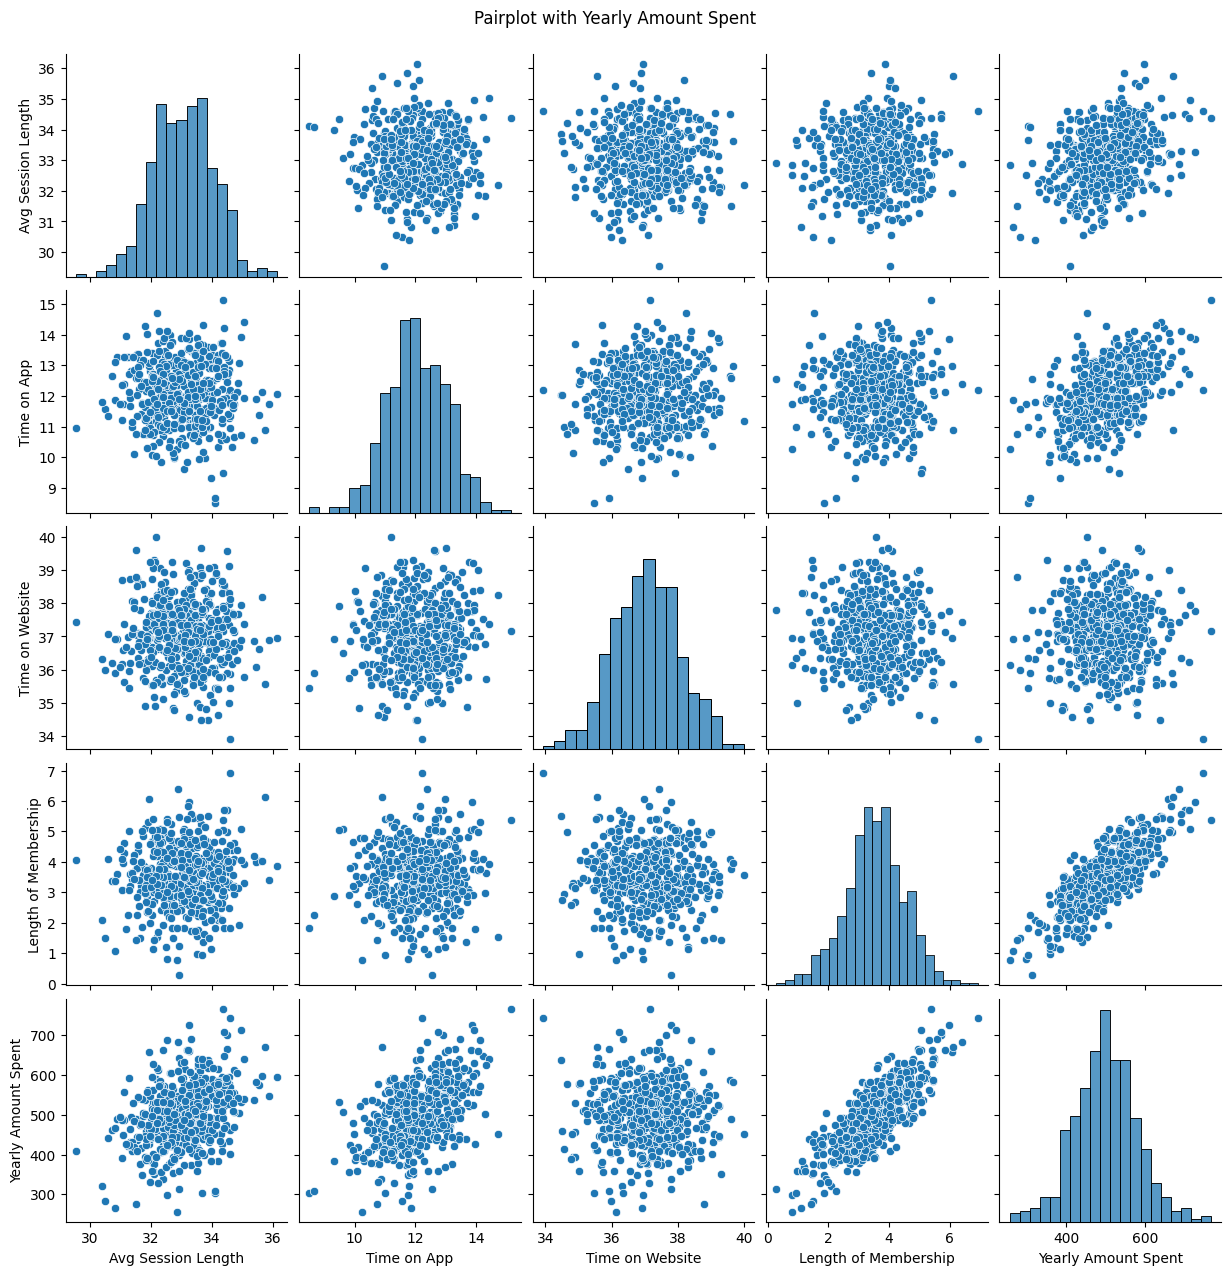

In [20]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot with Yearly Amount Spent', y=1.02)
plt.show()

In [12]:
# 3D scatter plot
fig = px.scatter_3d(df, x='Avg Session Length', y='Time on App', z='Yearly Amount Spent',
                    color='Length of Membership', color_continuous_scale='plasma',
                    title='3D Scatter Plot')
fig.show()


In [22]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [23]:
# Drop unnecessary columns
df_numeric = df.drop(columns=['Email', 'Address', 'Avatar'])

In [24]:
# Scatter plot for Time on App vs Yearly Amount Spent
fig_app = px.scatter(df, x='Time on App', y='Yearly Amount Spent',
                     color='Time on App', color_continuous_scale='Viridis',
                     title='Time on App vs Yearly Amount Spent')
fig_app.show()

In [26]:
# printing the Time on App relation with Yearly Amount Spent
print(df[['Time on App', 'Yearly Amount Spent']].corr())

                     Time on App  Yearly Amount Spent
Time on App             1.000000             0.499328
Yearly Amount Spent     0.499328             1.000000


In [25]:
# Scatter plot for Time on Website vs Yearly Amount Spent
fig_website = px.scatter(df, x='Time on Website', y='Yearly Amount Spent',
                         color='Time on Website', color_continuous_scale='Cividis',
                         title='Time on Website vs Yearly Amount Spent')
fig_website.show()

In [28]:
# printing the Time on Website relation with Yearly Amount Spent
print(df[['Time on Website', 'Yearly Amount Spent']].corr())


                     Time on Website  Yearly Amount Spent
Time on Website             1.000000            -0.002641
Yearly Amount Spent        -0.002641             1.000000


In [47]:
# Calculate correlation
corr = df.select_dtypes(include=[np.number]).corr()

# Correlation heatmap
fig = px.imshow(corr, text_auto='.2f', # Use text_auto to format the annotations
                title='Correlation Heatmap')
fig.show()

In [38]:
import plotly.express as px

# 3D scatter plot with Time on App, Time on Website, and Yearly Amount Spent
fig = px.scatter_3d(df, x='Avg Session Length', y='Time on App', z='Yearly Amount Spent',
                    color='Length of Membership', color_continuous_scale='Viridis',
                    title='3D Scatter Plot: Avg Session Length, Time on App, Yearly Amount Spent')
fig.show()


In [42]:
# 3D bubble plot
fig = px.scatter_3d(df, x='Time on App', y='Time on Website', z='Yearly Amount Spent',
                    size='Length of Membership', color='Avg Session Length', color_continuous_scale='Plasma',
                    title='3D Bubble Plot: Time on App, Time on Website, Yearly Amount Spent, and Length of Membership')
fig.show()


In [44]:
# 4D scatter plot
fig = px.scatter_3d(df, x='Avg Session Length', y='Time on App', z='Yearly Amount Spent',
                    color='Time on Website', size='Length of Membership', color_continuous_scale='Magma',
                    title='4D Scatter Plot: Avg Session Length, Time on App, Yearly Amount Spent, Time on Website, and Length of Membership')
fig.show()


In [48]:
# Heatmap with annotations
fig = px.imshow(corr, text_auto='.2f', aspect="auto", color_continuous_scale='Inferno',
                title='Correlation Heatmap with Annotations')
fig.show()


In [57]:
import altair as alt

# 4D scatter plot
chart = alt.Chart(df).mark_point().encode(
    x='Time on App',
    y='Yearly Amount Spent',
    color=alt.Color('Time on Website', scale=alt.Scale(scheme='magma')),
    size='Length of Membership',
    tooltip=['Time on App', 'Yearly Amount Spent', 'Time on Website', 'Length of Membership']
).properties(
    title='4D Scatter Plot: Time on App, Yearly Amount Spent, Time on Website, and Length of Membership'
).interactive()

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [58]:
# Scatter matrix
scatter_matrix = alt.Chart(df).mark_circle(size=60).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color=alt.Color('Yearly Amount Spent', scale=alt.Scale(scheme='inferno')),
    tooltip=['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
).properties(
    width=150,
    height=150
).repeat(
    row=['Yearly Amount Spent', 'Length of Membership', 'Time on Website', 'Time on App', 'Avg Session Length'],
    column=['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
).interactive()

scatter_matrix


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.RepeatChart(...)

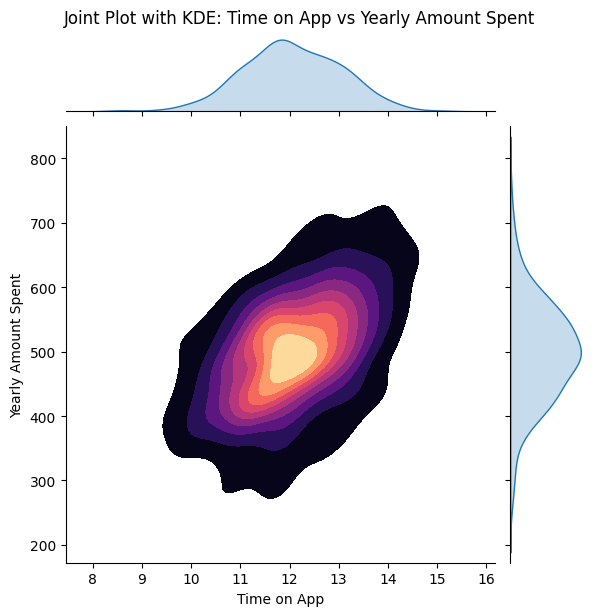

In [61]:
# Joint plot with KDE
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, kind='kde', fill=True, cmap='magma')
plt.suptitle('Joint Plot with KDE: Time on App vs Yearly Amount Spent', y=1.02)
plt.show()


In [66]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [67]:
df.drop(['Email', 'Address', 'Avatar'],axis=1)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [68]:
X = df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions
y_pred = lm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print the coefficients
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Absolute Error: 8.426091641432098
Mean Squared Error: 103.9155413650334
R-squared: 0.9808757641125855
                      Coefficient
Avg Session Length      25.724256
Time on App             38.597135
Time on Website          0.459148
Length of Membership    61.674732


In [71]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Absolute Error: 13.326895237240926
Random Forest - Mean Squared Error: 293.75988293677483
Random Forest - R-squared: 0.9459375063465479


In [72]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN - Mean Absolute Error: {mae_knn}')
print(f'KNN - Mean Squared Error: {mse_knn}')
print(f'KNN - R-squared: {r2_knn}')

KNN - Mean Absolute Error: 15.241018945768458
KNN - Mean Squared Error: 396.43283728164846
KNN - R-squared: 0.9270419516262814


In [73]:
# Support Vector Machine
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - Mean Absolute Error: {mae_svr}')
print(f'SVR - Mean Squared Error: {mse_svr}')
print(f'SVR - R-squared: {r2_svr}')

SVR - Mean Absolute Error: 8.550468529837836
SVR - Mean Squared Error: 108.59159691597833
SVR - R-squared: 0.9800151999640065


In [74]:
# Gradiant Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the GradientBoostingRegressor model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')

Gradient Boosting - Mean Absolute Error: 11.913974722709654
Gradient Boosting - Mean Squared Error: 216.62274813041873
Gradient Boosting - R-squared: 0.9601335423036145


In [75]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the AdaBoostRegressor model
abr = AdaBoostRegressor(n_estimators=100, random_state=42)
abr.fit(X_train, y_train)

# Make predictions
y_pred_abr = abr.predict(X_test)

# Evaluate the model
mae_abr = mean_absolute_error(y_test, y_pred_abr)
mse_abr = mean_squared_error(y_test, y_pred_abr)
r2_abr = r2_score(y_test, y_pred_abr)

print(f'Ada Boost Regressor - Mean Absolute Error: {mae_abr}')
print(f'Ada Boost Regressor - Mean Squared Error: {mse_abr}')
print(f'Ada Boost Regressor - R-squared: {r2_abr}')

Ada Boost Regressor - Mean Absolute Error: 18.03098780202186
Ada Boost Regressor - Mean Squared Error: 540.9221061822151
Ada Boost Regressor - R-squared: 0.9004506754287415


In [76]:
model = {
    'Linear Regression': lm,
    'Random Forest': rf,
    'KNN': knn,
    'SVR': svr,
    'Gradient Boosting': gb,
    'Ada Boost Regressor': abr
}

results = []

for name, model in model.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2': r2})

results_df = pd.DataFrame(results)
print(results_df)

                 Model        MAE         MSE        R2
0    Linear Regression   8.426092  103.915541  0.980876
1        Random Forest  13.326895  293.759883  0.945938
2                  KNN  15.241019  396.432837  0.927042
3                  SVR   8.550469  108.591597  0.980015
4    Gradient Boosting  11.913975  216.622748  0.960134
5  Ada Boost Regressor  18.030988  540.922106  0.900451


<ipython-input-79-98abc35ee7a5>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




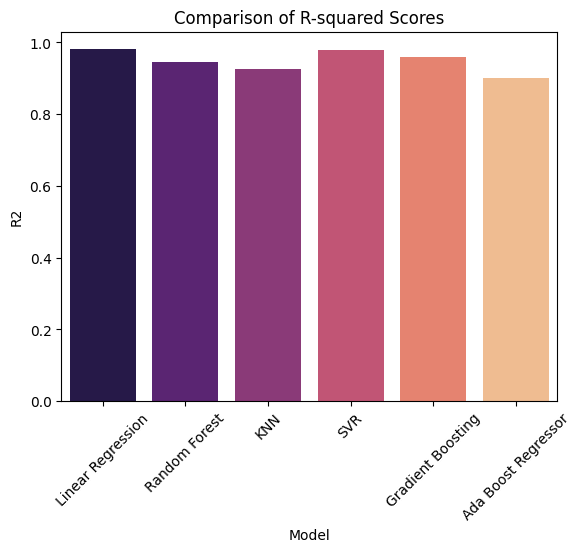

In [79]:
sns.barplot(x='Model', y='R2', data=results_df, palette='magma')
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-19b6c7575049>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




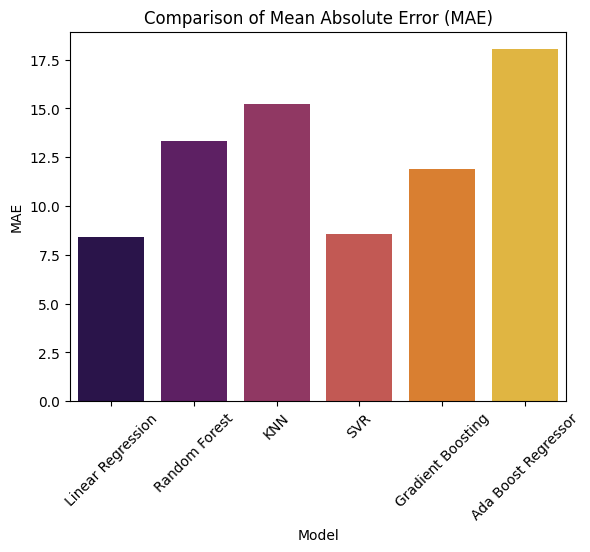

In [80]:
sns.barplot(x='Model', y='MAE', data=results_df, palette='inferno')
plt.title('Comparison of Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-85-9ad0e6c2490b>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




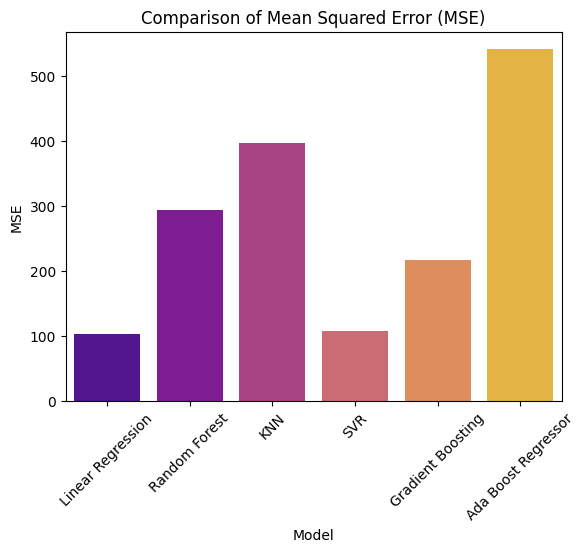

In [85]:
sns.barplot(x='Model', y='MSE', data=results_df, palette='plasma')
plt.title('Comparison of Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()